In [1]:
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import os
import timeit
import warnings
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from fancyimpute import IterativeImputer
import pickle
from sklearn.metrics import confusion_matrix, zero_one_loss
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV
from termcolor import colored
from sklearn.model_selection import train_test_split #Used to split dataset into training set and test set
from sklearn.preprocessing import StandardScaler  #Used to scale the data

from sklearn import metrics as metrics
from sklearn.linear_model import LogisticRegression #importing class to handle logistic classification
from sklearn.neighbors import KNeighborsClassifier #importing class to handle KNeighbors classification
from sklearn.svm import SVC  #importing class to handle support vector classification
from sklearn.naive_bayes import GaussianNB  #importing class to handle Naive bayes classification
from sklearn.tree import DecisionTreeClassifier #importing class to handle DecisionTree classification
from sklearn.ensemble import RandomForestClassifier #importing class to handle RandomForest classification

from sklearn.metrics import confusion_matrix  #used to visualised the various classification algorithm performance

import matplotlib.pyplot as plt  #used for visuallay representing the computed data 
from matplotlib.colors import ListedColormap #used for visuallay representing the computed data 

In [2]:
!pip install fancyimpute

# Importing the data 

In [3]:
train_df = pd.read_csv('exercise_40_train.csv')

In [4]:
final_test_df = pd.read_csv('exercise_40_test.csv')

In [5]:
train_df.shape

(40000, 101)

In [6]:
final_test_df.shape

(10000, 100)

In [7]:
train_df.head(20)

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x91,x92,x93,x94,x95,x96,x97,x98,x99,x100
0,0,0.165254,18.060003,Wed,1.077380,-1.339233,-1.584341,0.0062%,0.220784,1.816481,...,-0.397427,0.909479,no,5.492487,NaN,10.255579,7.627730,0,yes,104.251338
1,1,2.441471,18.416307,Friday,1.482586,0.920817,-0.759931,0.0064%,1.192441,3.513950,...,0.656651,9.093466,no,3.346429,4.321172,NaN,10.505284,1,yes,101.230645
2,1,4.427278,19.188092,Thursday,0.145652,0.366093,0.709962,-8e-04%,0.952323,0.782974,...,2.059615,0.305170,no,4.456565,NaN,8.754572,7.810979,0,yes,109.345215
3,0,3.925235,19.901257,Tuesday,1.763602,-0.251926,-0.827461,-0.0057%,-0.520756,1.825586,...,0.899392,5.971782,no,4.100022,1.151085,NaN,9.178325,1,yes,103.021970
4,0,2.868802,22.202473,Sunday,3.405119,0.083162,1.381504,0.0109%,-0.732739,2.151990,...,3.003595,1.046096,yes,3.234033,2.074927,9.987006,11.702664,0,yes,92.925935
5,0,1.926053,19.524376,Saturday,3.702574,2.300792,-0.331106,0.0079%,3.085443,0.472701,...,-0.689223,5.253010,no,NaN,NaN,9.882197,5.632881,0,NaN,97.129172
6,0,0.094162,18.894755,Thursday,2.027918,1.580408,1.190932,0.0174%,-0.331730,2.178622,...,1.095847,NaN,no,5.132039,0.973211,9.076239,9.197448,0,yes,89.613323
7,0,0.921300,19.160713,Sat,-1.274067,-0.867023,-2.036134,-0.0106%,2.830838,1.206701,...,-0.512785,1.986687,no,3.625493,-0.113036,12.495594,6.927711,0,yes,102.151914
8,0,0.589354,21.627989,Wednesday,1.672593,0.158446,2.073026,0.0032%,-0.908026,-0.064304,...,NaN,5.221553,no,4.270353,1.072603,9.789410,7.349307,0,yes,96.251348
9,0,1.016857,21.440000,Tuesday,-2.619848,0.637245,1.357868,0.0091%,1.471836,0.811922,...,NaN,7.427018,no,2.794465,0.219889,10.211048,10.970247,0,NaN,97.814997


In [8]:
final_test_df

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x91,x92,x93,x94,x95,x96,x97,x98,x99,x100
0,4.747627,20.509439,Wednesday,2.299105,-1.815777,-0.752166,0.0098%,-3.240309,0.587948,-0.260721,...,NaN,12.542333,no,3.107683,0.533904,12.438759,7.298306,0,NaN,93.567120
1,1.148654,19.301465,Fri,1.862200,-0.773707,-1.461276,0.0076%,0.443209,0.522113,-1.090886,...,-0.848567,7.213829,yes,4.276078,NaN,10.386987,12.527094,1,yes,98.607486
2,4.986860,18.769675,Saturday,1.040845,-1.548690,2.632948,-5e-04%,-1.167885,5.739275,0.222975,...,1.143388,10.483928,no,2.090868,-1.780474,11.328177,11.628247,0,yes,94.578246
3,3.709183,18.374375,Tuesday,-0.169882,-2.396549,-0.784673,-0.016%,-2.662226,1.548050,0.210141,...,0.693646,3.862867,no,2.643847,1.662240,10.064961,10.550014,1,NaN,100.346261
4,3.801616,20.205541,Monday,2.092652,-0.732784,-0.703101,0.0186%,0.056422,2.878167,-0.457618,...,-0.834763,3.632039,yes,4.074434,NaN,9.255766,12.716137,1,yes,102.578918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,3.429292,20.567549,Tue,-0.944209,-0.156811,0.552321,0.0141%,0.813529,2.506760,1.297405,...,0.783427,10.083976,no,4.457438,NaN,8.451324,8.871664,1,NaN,97.768429
9996,4.855832,20.015080,Wednesday,1.955436,-0.286804,2.550130,-0.0047%,-0.681608,1.436977,-0.485223,...,1.120420,NaN,yes,5.722095,3.013227,9.720261,10.596422,0,yes,100.595100
9997,6.892402,16.726071,Sat,-0.167786,NaN,0.292228,-0.003%,-0.061890,3.235828,-1.729844,...,0.119151,1.986440,no,5.349889,-1.269645,10.444184,15.766636,0,yes,100.188488
9998,1.235495,21.489726,Sunday,-0.937936,-0.408228,0.458284,0.0088%,-0.685368,2.687188,-0.161065,...,0.992868,5.332672,no,4.926153,NaN,NaN,11.666114,1,yes,97.778236


In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Columns: 101 entries, y to x100
dtypes: float64(86), int64(3), object(12)
memory usage: 30.8+ MB


In [10]:
train_df.describe()

,y,x1,x2,x4,x5,x6,x8,x9,x10,x11,...,x89,x90,x91,x92,x94,x95,x96,x97,x98,x100
count,40000.000000,40000.000000,40000.000000,40000.000000,37572.000000,40000.000000,40000.000000,40000.000000,40000.000000,34890.000000,...,29309.000000,40000.000000,34741.000000,37565.000000,37660.000000,27396.000000,33362.000000,40000.000000,40000.000000,40000.000000
mean,0.145075,2.999958,20.004865,0.002950,0.005396,0.007234,0.004371,2.722334,0.490339,100.008988,...,10.767838,3.000166,0.001636,4.002896,3.969385,0.031886,10.525530,10.002814,0.497650,100.024743
std,0.352181,1.994490,1.604291,1.462185,1.297952,1.358551,1.447223,1.966828,1.029863,13.343010,...,3.732763,1.164411,1.468790,3.017420,1.473939,1.823091,1.437581,1.986984,0.500001,5.247514
min,0.000000,-3.648431,13.714945,-5.137161,-5.616412,-6.113153,-6.376810,-3.143438,-3.538129,50.526543,...,6.106024,-2.173310,-6.328126,-3.384399,-1.663063,-6.885150,8.210456,1.911272,0.000000,78.340735
25%,0.000000,1.592714,18.921388,-1.026798,-0.872354,-0.909831,-0.971167,1.340450,-0.207833,91.056682,...,7.927605,2.211125,-0.982679,1.610899,2.943758,-1.190682,9.397548,8.665103,0.000000,96.516856
50%,0.000000,2.875892,20.005944,0.002263,0.008822,0.007335,0.002226,2.498876,0.486926,100.020965,...,9.931831,2.998776,0.005664,4.099763,3.912526,0.001523,10.358355,9.994318,0.000000,100.024977
75%,0.000000,4.270295,21.083465,1.043354,0.892467,0.926222,0.985023,3.827712,1.182994,109.025025,...,12.710543,3.786751,0.989632,6.113157,4.930563,1.248742,11.448559,11.342574,1.000000,103.558762
max,1.000000,13.837591,27.086468,5.150153,5.698128,5.639372,5.869889,18.006669,4.724186,148.784484,...,38.566041,7.130058,6.868747,16.734658,11.669024,7.631773,18.725468,17.861580,1.000000,122.406809


In [11]:
train_df.dtypes

y         int64
x1      float64
x2      float64
x3       object
x4      float64
         ...   
x96     float64
x97     float64
x98       int64
x99      object
x100    float64
Length: 101, dtype: object

In [12]:
#Seperate numerical variables
int_df = train_df.loc[:,train_df.dtypes == int]
int_df.head()

,y,x59,x98
0,0,0,0
1,1,0,1
2,1,0,0
3,0,0,1
4,0,0,0


In [13]:
int_df['y'].value_counts()

0    34197
1     5803
Name: y, dtype: int64

The outcome variable 'y' is clearly imbalanced , So we have to use use techniques such as SMOTE to balance out the dataset

In [14]:
#Seperate float variables
numeric_df = train_df.loc[:,train_df.dtypes == float]
numeric_df.head()

,x1,x2,x4,x5,x6,x8,x9,x10,x11,x12,...,x88,x89,x90,x91,x92,x94,x95,x96,x97,x100
0,0.165254,18.060003,1.077380,-1.339233,-1.584341,0.220784,1.816481,1.171788,109.626841,4.644568,...,1.079562,10.602395,2.770844,-0.397427,0.909479,5.492487,NaN,10.255579,7.627730,104.251338
1,2.441471,18.416307,1.482586,0.920817,-0.759931,1.192441,3.513950,1.419900,84.079367,1.459868,...,1.223852,10.408146,3.703013,0.656651,9.093466,3.346429,4.321172,NaN,10.505284,101.230645
2,4.427278,19.188092,0.145652,0.366093,0.709962,0.952323,0.782974,-1.247022,95.375221,1.098525,...,-0.353469,NaN,3.997183,2.059615,0.305170,4.456565,NaN,8.754572,7.810979,109.345215
3,3.925235,19.901257,1.763602,-0.251926,-0.827461,-0.520756,1.825586,2.223038,96.420382,-1.390239,...,1.761266,NaN,2.933707,0.899392,5.971782,4.100022,1.151085,NaN,9.178325,103.021970
4,2.868802,22.202473,3.405119,0.083162,1.381504,-0.732739,2.151990,-0.275406,90.769952,7.230125,...,-0.952377,NaN,2.922302,3.003595,1.046096,3.234033,2.074927,9.987006,11.702664,92.925935


In [15]:
#Seperate categorical variables
category_df = train_df.loc[:,train_df.dtypes == object]
category_df.head()

,x3,x7,x19,x24,x31,x33,x39,x60,x65,x77,x93,x99
0,Wed,0.0062%,$-908.650758424405,female,no,Colorado,5-10 miles,August,farmers,mercedes,no,yes
1,Friday,0.0064%,$-1864.9622875143,male,no,Tennessee,5-10 miles,April,allstate,mercedes,no,yes
2,Thursday,-8e-04%,$-543.187402955527,male,no,Texas,5-10 miles,September,geico,subaru,no,yes
3,Tuesday,-0.0057%,$-182.626380634258,male,no,Minnesota,5-10 miles,September,geico,nissan,no,yes
4,Sunday,0.0109%,$967.007090837503,male,yes,New York,5-10 miles,January,geico,toyota,yes,yes


In [16]:
#convert categorical vars ($,%) to numeric
category_df['x19'] = category_df['x19'].str.replace('$','').astype(float)
category_df['x7'] = category_df['x7'].str.replace('%','').astype(float)
category_df.head()

,x3,x7,x19,x24,x31,x33,x39,x60,x65,x77,x93,x99
0,Wed,0.0062,-908.650758,female,no,Colorado,5-10 miles,August,farmers,mercedes,no,yes
1,Friday,0.0064,-1864.962288,male,no,Tennessee,5-10 miles,April,allstate,mercedes,no,yes
2,Thursday,-0.0008,-543.187403,male,no,Texas,5-10 miles,September,geico,subaru,no,yes
3,Tuesday,-0.0057,-182.626381,male,no,Minnesota,5-10 miles,September,geico,nissan,no,yes
4,Sunday,0.0109,967.007091,male,yes,New York,5-10 miles,January,geico,toyota,yes,yes


In [17]:
numeric_df['x7'] = category_df['x7']
numeric_df['x19'] = category_df['x19']
category_df.drop(['x7','x19'],axis = 1, inplace = True)

In [18]:
category_df.head()

,x3,x24,x31,x33,x39,x60,x65,x77,x93,x99
0,Wed,female,no,Colorado,5-10 miles,August,farmers,mercedes,no,yes
1,Friday,male,no,Tennessee,5-10 miles,April,allstate,mercedes,no,yes
2,Thursday,male,no,Texas,5-10 miles,September,geico,subaru,no,yes
3,Tuesday,male,no,Minnesota,5-10 miles,September,geico,nissan,no,yes
4,Sunday,male,yes,New York,5-10 miles,January,geico,toyota,yes,yes


In [19]:
category_df['x59'] = int_df['x59']
category_df['x98'] = int_df['x98']
category_df.head()

,x3,x24,x31,x33,x39,x60,x65,x77,x93,x99,x59,x98
0,Wed,female,no,Colorado,5-10 miles,August,farmers,mercedes,no,yes,0,0
1,Friday,male,no,Tennessee,5-10 miles,April,allstate,mercedes,no,yes,0,1
2,Thursday,male,no,Texas,5-10 miles,September,geico,subaru,no,yes,0,0
3,Tuesday,male,no,Minnesota,5-10 miles,September,geico,nissan,no,yes,0,1
4,Sunday,male,yes,New York,5-10 miles,January,geico,toyota,yes,yes,0,0


In [20]:
category_df['x59'] = category_df['x59'].astype('object')
category_df['x98'] = category_df['x98'].astype('object')
category_df.dtypes

x3     object
x24    object
x31    object
x33    object
x39    object
x60    object
x65    object
x77    object
x93    object
x99    object
x59    object
x98    object
dtype: object

In [21]:
category_df.head()

,x3,x24,x31,x33,x39,x60,x65,x77,x93,x99,x59,x98
0,Wed,female,no,Colorado,5-10 miles,August,farmers,mercedes,no,yes,0,0
1,Friday,male,no,Tennessee,5-10 miles,April,allstate,mercedes,no,yes,0,1
2,Thursday,male,no,Texas,5-10 miles,September,geico,subaru,no,yes,0,0
3,Tuesday,male,no,Minnesota,5-10 miles,September,geico,nissan,no,yes,0,1
4,Sunday,male,yes,New York,5-10 miles,January,geico,toyota,yes,yes,0,0


In [22]:
#print counts of each categorical variable
for col in category_df:
    print(category_df[col].value_counts(dropna=False),'\n')

Wednesday    4930
Monday       4144
Friday       3975
Tuesday      3915
Sunday       3610
Saturday     3596
Tue          2948
Thursday     2791
Mon          2200
Wed          2043
Sat          1787
Thur         1643
Fri          1620
Sun           798
Name: x3, dtype: int64 

female    18158
male      17986
NaN        3856
Name: x24, dtype: int64 

no     34022
yes     5978
Name: x31, dtype: int64 

NaN               7171
California        3393
Texas             2252
Florida           1802
New York          1714
Illinois          1240
Pennsylvania      1233
Ohio              1114
Michigan           982
Georgia            918
North Carolina     910
New Jersey         870
Virginia           791
Washington         750
Tennessee          690
Indiana            674
Arizona            665
Massachusetts      638
Wisconsin          635
Missouri           634
Minnesota          611
Maryland           581
Alabama            554
Colorado           530
Louisiana          501
South Carolina     491

In [23]:
#create mask to align same categories with different names
day_mask1 = category_df['x3'] == 'Mon'
day_mask2 = category_df['x3'] == 'Tue'
day_mask3 = category_df['x3']  == 'Wed'
day_mask4 = category_df['x3'] == 'Thur'
day_mask5 = category_df['x3'] == 'Fri'
day_mask6 = category_df['x3']  == 'Sat'
day_mask7 = category_df['x3']  == 'Sun'

In [24]:
#align names
category_df['x3'][day_mask1] = 'Monday'
category_df['x3'][day_mask2] = 'Tuesday'
category_df['x3'][day_mask3] = 'Wednesday'
category_df['x3'][day_mask4] = 'Thursday'
category_df['x3'][day_mask5] = 'Friday'
category_df['x3'][day_mask6] = 'Saturday'
category_df['x3'][day_mask7] = 'Sunday'

In [25]:
#print counts of each categorical variable
for col in category_df:
    print(category_df[col].value_counts(dropna=False),'\n')

Wednesday    6973
Tuesday      6863
Monday       6344
Friday       5595
Saturday     5383
Thursday     4434
Sunday       4408
Name: x3, dtype: int64 

female    18158
male      17986
NaN        3856
Name: x24, dtype: int64 

no     34022
yes     5978
Name: x31, dtype: int64 

NaN               7171
California        3393
Texas             2252
Florida           1802
New York          1714
Illinois          1240
Pennsylvania      1233
Ohio              1114
Michigan           982
Georgia            918
North Carolina     910
New Jersey         870
Virginia           791
Washington         750
Tennessee          690
Indiana            674
Arizona            665
Massachusetts      638
Wisconsin          635
Missouri           634
Minnesota          611
Maryland           581
Alabama            554
Colorado           530
Louisiana          501
South Carolina     491
Kentucky           478
Oregon             452
Connecticut        422
Oklahoma           397
Kansas             378
Nevada    

In [26]:
#print counts of each integer variable
for col in int_df:
    print(int_df[col].value_counts(dropna=False),'\n')

0    34197
1     5803
Name: y, dtype: int64 

0    36014
1     3986
Name: x59, dtype: int64 

0    20094
1    19906
Name: x98, dtype: int64 



In [27]:
numeric_df.isna().sum()

x1         0
x2         0
x4         0
x5      2428
x6         0
        ... 
x96     6638
x97        0
x100       0
x7         0
x19        0
Length: 88, dtype: int64

In [28]:
numeric_df.shape

(40000, 88)

Imputation for the missing values in the numerical features

In [29]:
#perform inductive, single imputation with numerical df
#NOTE: Will not attempt multiple imputation
imp = IterativeImputer()
imp_num_df = pd.DataFrame(imp.fit_transform(numeric_df))
imp_num_df.index = numeric_df.index
imp_num_df.columns = numeric_df.columns

In [30]:
imp_num_df.shape

(40000, 88)

In [31]:
imp_num_df.isna().sum()

x1      0
x2      0
x4      0
x5      0
x6      0
       ..
x96     0
x97     0
x100    0
x7      0
x19     0
Length: 88, dtype: int64

In [32]:
category_df.isna().sum()

x3         0
x24     3856
x31        0
x33     7171
x39        0
x60        0
x65        0
x77     9257
x93        0
x99    12836
x59        0
x98        0
dtype: int64

In [33]:
#impute missing categorical vars as most frequent in category
for col in category_df:
    max_freq = category_df[col].value_counts().index[0]
    category_df[col][pd.isna(category_df[col])] = max_freq

In [34]:
category_df.isna().sum()

x3     0
x24    0
x31    0
x33    0
x39    0
x60    0
x65    0
x77    0
x93    0
x99    0
x59    0
x98    0
dtype: int64

Null values have been removed through max frequency 

In [35]:
category_df

,x3,x24,x31,x33,x39,x60,x65,x77,x93,x99,x59,x98
0,Wednesday,female,no,Colorado,5-10 miles,August,farmers,mercedes,no,yes,0,0
1,Friday,male,no,Tennessee,5-10 miles,April,allstate,mercedes,no,yes,0,1
2,Thursday,male,no,Texas,5-10 miles,September,geico,subaru,no,yes,0,0
3,Tuesday,male,no,Minnesota,5-10 miles,September,geico,nissan,no,yes,0,1
4,Sunday,male,yes,New York,5-10 miles,January,geico,toyota,yes,yes,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
39995,Sunday,female,no,California,5-10 miles,July,farmers,ford,no,yes,0,1
39996,Thursday,male,yes,Illinois,5-10 miles,July,progressive,ford,no,yes,0,0
39997,Monday,male,yes,California,5-10 miles,August,geico,ford,no,yes,0,1
39998,Tuesday,male,no,Ohio,5-10 miles,December,farmers,ford,no,yes,0,0


In [36]:
for col in ['x3', 'x24', 'x31', 'x33', 'x39', 'x60', 'x65', 'x77', 'x93', 'x99','x59', 'x98']:
    category_df[col] = category_df[col].astype('category')

In [37]:
category_df.dtypes

x3     category
x24    category
x31    category
x33    category
x39    category
x60    category
x65    category
x77    category
x93    category
x99    category
x59    category
x98    category
dtype: object

Creating dummy variables for our categorical columns

In [38]:
transformed_category_df = pd.get_dummies(category_df, columns=['x3', 'x24', 'x31', 'x33', 'x39', 'x60', 'x65', 'x77', 'x93', 'x99','x59', 'x98'], drop_first=True)

In [39]:
transformed_category_df

,x3_Monday,x3_Saturday,x3_Sunday,x3_Thursday,x3_Tuesday,x3_Wednesday,x24_male,x31_yes,x33_Alaska,x33_Arizona,...,x65_progressive,x77_chevrolet,x77_ford,x77_mercedes,x77_nissan,x77_subaru,x77_toyota,x93_yes,x59_1,x98_1
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,0,0,1,0,0,0,1,1,0,0,...,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
39996,0,0,0,1,0,0,1,1,0,0,...,1,0,1,0,0,0,0,0,0,0
39997,1,0,0,0,0,0,1,1,0,0,...,0,0,1,0,0,0,0,0,0,1
39998,0,0,0,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


Transforming numerical features using Standard Scaling 

In [44]:
scalar = StandardScaler()
scaled_num_df = pd.DataFrame(scalar.fit_transform(imp_num_df))

In [45]:
#create df of x vars from imputed df and encoded df
x_df = pd.concat([scaled_num_df, transformed_category_df], axis = 1)
x_df

,0,1,2,3,4,5,6,7,8,9,...,x65_progressive,x77_chevrolet,x77_ford,x77_mercedes,x77_nissan,x77_subaru,x77_toyota,x93_yes,x59_1,x98_1
0,-1.421286,-1.212302,0.734820,-1.045162,-1.171538,0.149538,-0.460571,0.661698,0.725035,0.448960,...,0,0,0,1,0,0,0,0,0,0
1,-0.280019,-0.990205,1.011947,0.712559,-0.564701,0.820941,0.402488,0.902618,-1.199215,-0.441743,...,0,0,0,1,0,0,0,0,0,1
2,0.715641,-0.509124,0.097596,0.281131,0.517269,0.655022,-0.986047,-1.687003,-0.348405,-0.542804,...,0,0,0,0,0,1,0,0,0,0
3,0.463922,-0.064582,1.204139,-0.199525,-0.614409,-0.362856,-0.455942,1.682477,-0.269683,-1.238867,...,0,0,0,0,1,0,0,0,0,1
4,-0.065760,1.369849,2.326799,0.061085,1.011583,-0.509334,-0.289985,-0.743549,-0.695277,1.172094,...,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,-0.705191,-0.234694,0.541489,-0.645885,0.442786,1.505981,0.243941,-1.178515,-0.390194,0.488094,...,0,0,1,0,0,0,0,0,0,1
39996,-0.647428,-1.790362,-1.832629,0.893798,0.337622,-0.036612,0.644311,0.949396,1.188914,0.180008,...,1,0,1,0,0,0,0,0,0,0
39997,-0.649711,-1.359163,-0.399619,0.604052,0.338677,0.622076,0.128751,-0.253853,0.597937,-0.530786,...,0,0,1,0,0,0,0,0,0,1
39998,0.483062,0.174991,0.292146,0.035441,1.335506,-0.280286,-1.510056,-0.960948,-0.503648,-1.025446,...,0,0,1,0,0,0,0,0,0,0


In [46]:
#sepearte dependant 'y' binary variable
y_df = int_df['y'].astype('int')
y_df

0        0
1        1
2        1
3        0
4        0
        ..
39995    0
39996    0
39997    0
39998    0
39999    0
Name: y, Length: 40000, dtype: int64

In [47]:
#split x and y data into train/test sets
X_train, X_test, y_train, y_test = train_test_split(x_df,
                                  y_df,
                                  test_size=0.2,
                                  random_state=1)

In [48]:

from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE 

In [49]:
X_train.dtypes

0             float64
1             float64
2             float64
3             float64
4             float64
               ...   
x77_subaru      uint8
x77_toyota      uint8
x93_yes         uint8
x59_1           uint8
x98_1           uint8
Length: 170, dtype: object

In [50]:
X_test.dtypes

0             float64
1             float64
2             float64
3             float64
4             float64
               ...   
x77_subaru      uint8
x77_toyota      uint8
x93_yes         uint8
x59_1           uint8
x98_1           uint8
Length: 170, dtype: object

Synthetic minority oversampling technique

In [51]:
oversample = SMOTE()
X_train_balanced, y_train_balanced = oversample.fit_resample(X_train, y_train)

In [52]:
#scoring metric to optimize
score = 'roc_auc'

In [53]:
def conf_matrix_heatmap(confusion_matrix):
    sns.heatmap(confusion_matrix, annot=True, cmap="Blues" ,fmt='')
    plt.tight_layout()
    plt.title('Confusion Matrix for Base Model for the test data', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')


    b, t = plt.ylim() # discover the values for bottom and top
    b += 0.8 # Add 0.8 to the bottom
    t -= 0.8 # Subtract 0.8 from the top
    plt.ylim(b, t) # update the ylim(bottom, top) values
    plt.show()

# Model 1: GLM

In [54]:
#Setup recursive feature reduction w/ cross validation
glm = RFECV(LogisticRegression(),
      scoring = score,
      n_jobs = -1,
      cv = 3,
      step = 5)

In [55]:
glm.fit(X_train_balanced, y_train_balanced)

/Users/mohammedhussain/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/mohammedhussain/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/lin

/Users/mohammedhussain/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/mohammedhussain/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/lin

/Users/mohammedhussain/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/mohammedhussain/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/lin

RFECV(cv=3, estimator=LogisticRegression(), n_jobs=-1, scoring='roc_auc',
      step=5)

Confusion Matrix
---------------------------
 [[6552  286]
 [ 949  213]]
---------------------------
Error: 15.4375%
Accuracy Score: 84.5625%
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      6838
           1       0.43      0.18      0.26      1162

    accuracy                           0.85      8000
   macro avg       0.65      0.57      0.59      8000
weighted avg       0.81      0.85      0.82      8000

accuracy: [0.9581749  0.18330465]



  ROC/AUC values for the GLM classifier :  0.7455183622552718



  precision values for the GLM classifier :  0.42685370741482964



  Recall values for the GLM classifier :  0.18330464716006883



  F1 score values for the GLM classifier :  0.2564720048163756


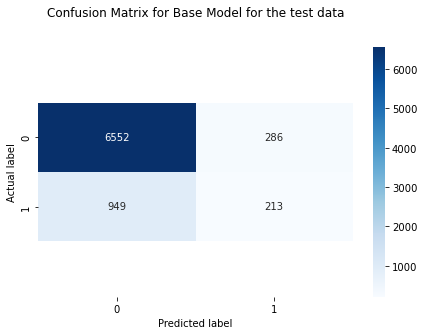

In [203]:
from sklearn.metrics import precision_recall_curve
pred_y_glm = glm.predict(X_test)

# analyse prediction
c_matrix_glm = confusion_matrix(y_test, pred_y_glm)  # confusion matrix
glm_error = zero_one_loss(y_test, pred_y_glm)  # error
glm_score = accuracy_score(y_test, pred_y_glm)  # accuracy score

print('Confusion Matrix\n---------------------------\n', c_matrix_glm)
print('---------------------------')
print("Error: {:.4f}%".format(glm_error * 100))
print("Accuracy Score: {:.4f}%".format(glm_score * 100))
print(classification_report(y_test, pred_y_glm))
print('accuracy:', c_matrix_glm.diagonal() / c_matrix_glm.sum(axis=1))
    
# Calculating the predicted probabilities for the test data
y_probs_test_glm = glm.predict_proba(X_test)
    
# Generating the confusion matrix and classification report for test data
conf_matrix_grid_test = metrics.confusion_matrix(y_test, pred_y_glm)
clf_report_grid_test = metrics.classification_report(y_test, pred_y_glm)

# Calculating the ROC AUC score for the Logistic Regression model
roc_auc_glm = metrics.roc_auc_score(y_test, y_probs_test_glm[:,1])
print('\n\n\n  ROC/AUC values for the GLM classifier : ',roc_auc_glm)

precision_glm,recall_glm,thresholds_glm = precision_recall_curve(y_test, pred_y_glm)
print('\n\n\n  precision values for the GLM classifier : ',precision_glm[1])

print('\n\n\n  Recall values for the GLM classifier : ',recall_glm[1])

f1_score_glm = 2 *precision_glm[1]*recall_glm[1]/(precision_glm[1]+recall_glm[1])
print('\n\n\n  F1 score values for the GLM classifier : ',f1_score_glm)
# Plot non-normalized confusion matrix
conf_matrix_heatmap(c_matrix_glm)

# Model 2 : SVM

In [57]:
#setup grid search
grid_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]

#run grid search to find best gamma
svm_clf = GridSearchCV(SVC(probability=True),
                   grid_parameters,
                   cv=3,
                   scoring=score,
                   n_jobs = -1)

#fit SVM
svm_clf.fit(X_train_balanced, y_train_balanced)



/Users/mohammedhussain/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/mohammedhussain/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/mohammedhussain/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/mohammedhussain/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int

/Users/mohammedhussain/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/mohammedhussain/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/mohammedhussain/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/mohammedhussain/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int

GridSearchCV(cv=3, estimator=SVC(probability=True), n_jobs=-1,
             param_grid=[{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             scoring='roc_auc')

Confusion Matrix
---------------------------
 [[6649  189]
 [ 992  170]]
---------------------------
Error: 14.7625%
Accuracy Score: 85.2375%
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      6838
           1       0.47      0.15      0.22      1162

    accuracy                           0.85      8000
   macro avg       0.67      0.56      0.57      8000
weighted avg       0.81      0.85      0.82      8000

accuracy: [0.97236034 0.14629948]



  ROC/AUC values for the SVM classifier :  0.744973165549005



  precision values for the SVM classifier :  0.4735376044568245



  Recall values for the SVM classifier :  0.14629948364888123



  F1 score values for the SVM classifier :  0.22353714661406965


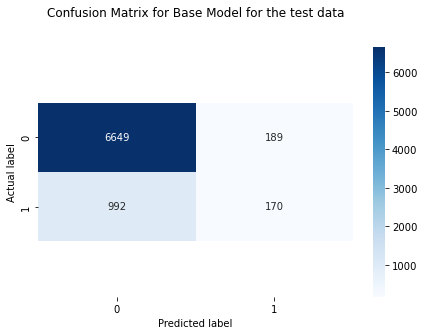

In [204]:
# predict test data
pred_y_svm = svm_clf.predict(X_test)

# analyse prediction
c_matrix_svm = confusion_matrix(y_test, pred_y_svm)  # confusion matrix
svm_error = zero_one_loss(y_test, pred_y_svm)  # error
svm_score = accuracy_score(y_test, pred_y_svm)  # accuracy score

print('Confusion Matrix\n---------------------------\n', c_matrix_svm)
print('---------------------------')
print("Error: {:.4f}%".format(svm_error * 100))
print("Accuracy Score: {:.4f}%".format(svm_score * 100))
print(classification_report(y_test, pred_y_svm))
print('accuracy:', c_matrix_svm.diagonal() / c_matrix_svm.sum(axis=1))
    
# Calculating the predicted probabilities for the test data
y_probs_test_svm = svm_clf.predict_proba(X_test)
    
# Generating the confusion matrix and classification report for test data
conf_matrix_svm = metrics.confusion_matrix(y_test, pred_y_svm)
clf_report_svm = metrics.classification_report(y_test, pred_y_svm)

# Calculating the ROC AUC score for Random forest base model
roc_auc_svm = metrics.roc_auc_score(y_test, y_probs_test_svm[:,1])
print('\n\n\n  ROC/AUC values for the SVM classifier : ',roc_auc_svm)


precision_svm,recall_svm,thresholds_svm = precision_recall_curve(y_test, pred_y_svm)
print('\n\n\n  precision values for the SVM classifier : ',precision_svm[1])

print('\n\n\n  Recall values for the SVM classifier : ',recall_svm[1])


f1_score_svm = 2 *precision_svm[1]*recall_svm[1]/(precision_svm[1]+recall_svm[1])
print('\n\n\n  F1 score values for the SVM classifier : ',f1_score_svm)
# Plot non-normalized confusion matrix
conf_matrix_heatmap(c_matrix_svm)

In [176]:
#Generate predicted probabilites
svm_clf_probs = svm_clf.predict_proba(X_test)
print('AUC: ', roc_auc_score(y_test, svm_clf_probs[:,1]))
print('Accuracy: ', svm_clf.score(X_test, y_test))

AUC:  0.744973165549005
Accuracy:  0.7449677538550139


In [ ]:

def conf_matrix_heatmap(confusion_matrix):
    sns.heatmap(confusion_matrix, annot=True, cmap="Blues" ,fmt='')
    plt.tight_layout()
    plt.title('Confusion Matrix for Base Model for the test data', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')


    b, t = plt.ylim() # discover the values for bottom and top
    b += 0.8 # Add 0.8 to the bottom
    t -= 0.8 # Subtract 0.8 from the top
    plt.ylim(b, t) # update the ylim(bottom, top) values
    plt.show()

# Model 3 : Random Forest

------Random Forest Classification-------
Training the Random Forest Classifier.......
The time difference is : 62.113690626996686
Predicting test data.......
Confusion Matrix
---------------------------
 [[6711  127]
 [1071   91]]
---------------------------
Error: 14.9750%
Accuracy Score: 85.0250%
              precision    recall  f1-score   support

           0       0.86      0.98      0.92      6838
           1       0.42      0.08      0.13      1162

    accuracy                           0.85      8000
   macro avg       0.64      0.53      0.52      8000
weighted avg       0.80      0.85      0.80      8000

accuracy: [0.98142732 0.07831325]



  ROC/AUC values for the Random Forest classifier :  0.745879750145864



  precision values for the Random Forest classifier :  0.41743119266055045



  Recall values for the Random Forest classifier :  0.0783132530120482



  F1 score values for the Random Foest classifier :  0.1318840579710145


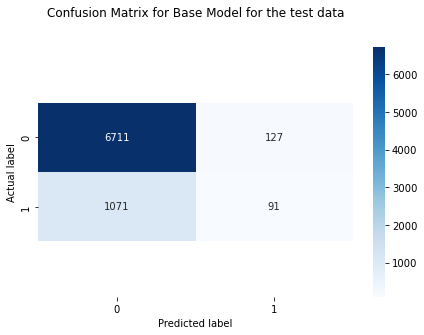

In [205]:
# Random Forest
print(colored("------Random Forest Classification-------", 'red'))
# build classifier
clf_rf = RandomForestClassifier(criterion='entropy', max_depth=30, n_estimators=100, random_state=0)

# start timer
start_time = timeit.default_timer()

print("Training the Random Forest Classifier.......")

clf_rf.fit(X_train_balanced, y_train_balanced)

# end timer
print("The time difference is :", timeit.default_timer() - start_time)

print("Predicting test data.......")

# predict test data
pred_y_rf = clf_rf.predict(X_test)

# analyse prediction
c_matrix_rf = confusion_matrix(y_test, pred_y_rf)  # confusion matrix
rf_error = zero_one_loss(y_test, pred_y_rf)  # error
rf_score = accuracy_score(y_test, pred_y_rf)  # accuracy score

print('Confusion Matrix\n---------------------------\n', c_matrix_rf)
print('---------------------------')
print("Error: {:.4f}%".format(rf_error * 100))
print("Accuracy Score: {:.4f}%".format(rf_score * 100))
print(classification_report(y_test, pred_y_rf))
print('accuracy:', c_matrix_rf.diagonal() / c_matrix_rf.sum(axis=1))
    
# Calculating the predicted probabilities for the test data
y_probs_test_rf = clf_rf.predict_proba(X_test)
    
# Generating the confusion matrix and classification report for test data
conf_matrix_rf = metrics.confusion_matrix(y_test, pred_y_rf)
clf_report_rf = metrics.classification_report(y_test, pred_y_rf)

# Calculating the ROC AUC score for Random forest base model
roc_auc_rf_base = metrics.roc_auc_score(y_test, y_probs_test_rf[:,1])
print('\n\n\n  ROC/AUC values for the Random Forest classifier : ',roc_auc_rf_base)


precision_rf,recall_rf,thresholds_rf = precision_recall_curve(y_test, pred_y_rf)
print('\n\n\n  precision values for the Random Forest classifier : ',precision_rf[1])

print('\n\n\n  Recall values for the Random Forest classifier : ',recall_rf[1])
f1_score_rf = 2 *precision_rf[1]*recall_rf[1]/(precision_rf[1]+recall_rf[1])
print('\n\n\n  F1 score values for the Random Foest classifier : ',f1_score_rf)


# Plot non-normalized confusion matrix
conf_matrix_heatmap(c_matrix_rf)

# Model 4 : AdaBoost

------Adaboost Classification-------
Training the Adaboost Classifier.......
The time difference is : 9.272236739008804
Predicting test data.......
Confusion Matrix
---------------------------
 [[5395 1443]
 [ 657  505]]
---------------------------
Error: 26.2500%
Accuracy Score: 73.7500%
              precision    recall  f1-score   support

           0       0.89      0.79      0.84      6838
           1       0.26      0.43      0.32      1162

    accuracy                           0.74      8000
   macro avg       0.58      0.61      0.58      8000
weighted avg       0.80      0.74      0.76      8000

accuracy:  [0.78897338 0.43459552]



  ROC/AUC values for ADAboost classifier :  0.6894374179121534



  precision values for the AdaBoost classifier :  0.25924024640657084



  Recall values for the AdaBoost classifier :  0.43459552495697074



  F1 score values for the AdaBoost classifier :  0.3247588424437299


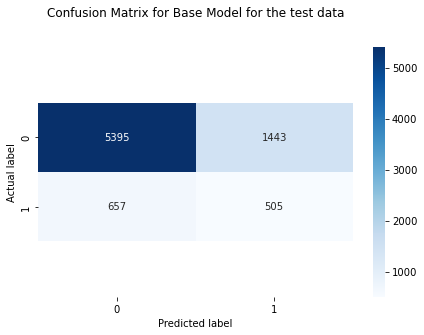

In [206]:
# adaboost
from sklearn.ensemble import AdaBoostClassifier


print(colored("------Adaboost Classification-------", 'red'))
# define classifier
clf_abc = AdaBoostClassifier(n_estimators=15, learning_rate=1)

# time it
starttime = timeit.default_timer()

print("Training the Adaboost Classifier.......")

# fit data
clf_abc.fit(X_train_balanced, y_train_balanced)

print("The time difference is :", timeit.default_timer() - starttime)

print("Predicting test data.......")

# predict
pred_y_ada = clf_abc.predict(X_test)

# results
c_matrix_ada = confusion_matrix(y_test, pred_y_ada)
ada_error = zero_one_loss(y_test, pred_y_ada)
ada_score = accuracy_score(y_test, pred_y_ada)

# display results
print('Confusion Matrix\n---------------------------\n', c_matrix_ada)
print('---------------------------')
print("Error: {:.4f}%".format(ada_error * 100))
print("Accuracy Score: {:.4f}%".format(ada_score * 100))
print(classification_report(y_test, pred_y_ada))
print('accuracy: ', c_matrix_ada.diagonal() / c_matrix_ada.sum(axis=1))
    
# Calculating the predicted probabilities for the test data
y_probs_test_ada = clf_abc.predict_proba(X_test)
    
# Generating the confusion matrix and classification report for test data
conf_matrix_ada = metrics.confusion_matrix(y_test, pred_y_ada)
clf_report_ada = metrics.classification_report(y_test, pred_y_ada)

# Calculating the ROC AUC score for the ADAboost classifier model
roc_auc_adaboost = metrics.roc_auc_score(y_test, y_probs_test_ada[:,1])
print('\n\n\n  ROC/AUC values for ADAboost classifier : ',roc_auc_adaboost)


precision_ada,recall_ada,thresholds_ada = precision_recall_curve(y_test, pred_y_ada)
print('\n\n\n  precision values for the AdaBoost classifier : ',precision_ada[1])

print('\n\n\n  Recall values for the AdaBoost classifier : ',recall_ada[1])


f1_score_ada = 2 *precision_ada[1]*recall_ada[1]/(precision_ada[1]+recall_ada[1])
print('\n\n\n  F1 score values for the AdaBoost classifier : ',f1_score_ada)

# Plot non-normalized confusion matrix
conf_matrix_heatmap(c_matrix_ada)


# Model 5 : Stochastic gradient  Descent classifier

------SGD Classification-------
Training the SGD Classifier.......
The time difference is : 2.6587703060067724
Predicting test data.......
Confusion Matrix
---------------------------
 [[6496  342]
 [1051  111]]
---------------------------
Error: 17.4125%
Accuracy Score: 82.5875%
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      6838
           1       0.25      0.10      0.14      1162

    accuracy                           0.83      8000
   macro avg       0.55      0.52      0.52      8000
weighted avg       0.77      0.83      0.79      8000

accuracy:  [0.94998538 0.09552496]



  ROC/AUC values for SGD classifier :  0.6894374179121534



  precision values for the SGD classifier :  0.24503311258278146



  Recall values for the SGD classifier :  0.09552495697074011



  F1 score values for the SGD classifier :  0.1319564450687257


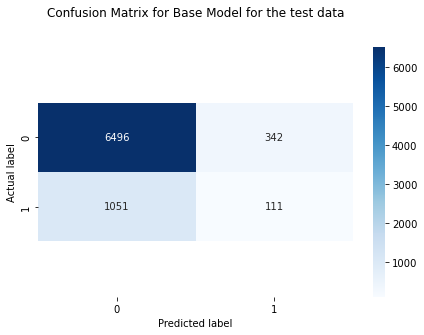

In [207]:
from sklearn.linear_model import SGDClassifier
print(colored("------SGD Classification-------", 'red'))
# build classifier
clf_sgd = SGDClassifier(loss="hinge", penalty="l1", max_iter=200, alpha=0.001, random_state=0)

# start timer
starttime = timeit.default_timer()

print("Training the SGD Classifier.......")

# train model
clf_sgd = clf_sgd.fit(X_train_balanced, y_train_balanced)

print("The time difference is :", timeit.default_timer() - starttime)

print("Predicting test data.......")

# predict
pred_y_sgd = clf_sgd.predict(X_test)

c_matrix_sgd = confusion_matrix(y_test, pred_y_sgd)
sgd_error = zero_one_loss(y_test, pred_y_sgd)
sgd_score = accuracy_score(y_test, pred_y_sgd)

print('Confusion Matrix\n---------------------------\n', c_matrix_sgd)
print('---------------------------')
print("Error: {:.4f}%".format(sgd_error * 100))
print("Accuracy Score: {:.4f}%".format(sgd_score * 100))
print(classification_report(y_test, pred_y_sgd))
print('accuracy: ', c_matrix_sgd.diagonal() / c_matrix_sgd.sum(axis=1))

 ##Calculating the predicted probabilities for the test data
y_probs_test_sgd = clf_abc.predict_proba(X_test)
    
# Generating the confusion matrix and classification report for test data
conf_matrix_ada = metrics.confusion_matrix(y_test, pred_y_sgd)
clf_report_ada = metrics.classification_report(y_test, pred_y_sgd)

# Calculating the ROC AUC score for the ADAboost classifier model

roc_auc_sgd = metrics.roc_auc_score(y_test, y_probs_test_sgd[:,1])
print('\n\n\n  ROC/AUC values for SGD classifier : ',roc_auc_sgd)

precision_sgd,recall_sgd,thresholds_sgd = precision_recall_curve(y_test, pred_y_sgd)
print('\n\n\n  precision values for the SGD classifier : ',precision_sgd[1])

print('\n\n\n  Recall values for the SGD classifier : ',recall_sgd[1])
    
f1_score_sgd = 2 *precision_sgd[1]*recall_sgd[1]/(precision_ada[1]+recall_sgd[1])
print('\n\n\n  F1 score values for the SGD classifier : ',f1_score_sgd)

# Plot non-normalized confusion matrix
conf_matrix_heatmap(c_matrix_sgd)

# Comparing all of the models

In [145]:
roc_values = [roc_auc_glm,roc_auc_svm,roc_auc_rf_base,roc_auc_adaboost,roc_auc_sgd]
roc_values

[0.7455183622552718,
 0.744973165549005,
 0.745879750145864,
 0.6894374179121534,
 0.6894374179121534]

In [156]:
accuracy_list = [glm_score,svm_score,rf_score,ada_score,sgd_score]
accuracy_values = [element * 100 for element in accuracy_list]
accuracy_values

[84.5625, 85.2375, 85.02499999999999, 73.75, 82.5875]

In [178]:
error_list = [glm_error,svm_error,rf_error,ada_error,sgd_error]
error_values = [element * 100 for element in error_list]
error_values

[15.437500000000004,
 14.762500000000001,
 14.975000000000005,
 26.249999999999996,
 17.412499999999998]

In [200]:
precision_list = [precision_glm[1],precision_svm[1],precision_rf[1],precision_ada[1],precision_sgd[1]]
precision_values = [element * 100 for element in precision_list]
precision_values

[42.68537074148296,
 47.353760445682454,
 41.74311926605505,
 25.924024640657084,
 24.503311258278146]

In [201]:
recall_list = [recall_glm[1],recall_svm[1],recall_rf[1],recall_ada[1],recall_sgd[1]]
recall_values = [element * 100 for element in recall_list]
recall_values

[18.330464716006883,
 14.629948364888124,
 7.83132530120482,
 43.459552495697075,
 9.552495697074011]

In [209]:
f1_score_list = [f1_score_glm,f1_score_svm,f1_score_rf,f1_score_ada,f1_score_sgd]
f1_score_values = [element * 100 for element in f1_score_list]
f1_score_values

[25.64720048163756,
 22.353714661406965,
 13.18840579710145,
 32.475884244372985,
 13.19564450687257]

In [183]:
models = ['GLM','SVM','RF','ADABoost','SGD classfier']

In [211]:
comparison_df = pd.DataFrame(list(zip(accuracy_values,roc_values,error_values,precision_values,recall_values,f1_score_values)), index = models,columns= ['Accuracy', 'ROC/AUC','Error','Precision','Recall','F1 score'] )
comparison_df

,Accuracy,ROC/AUC,Error,Precision,Recall,F1 score
GLM,84.5625,0.745518,15.4375,42.685371,18.330465,25.647200
SVM,85.2375,0.744973,14.7625,47.353760,14.629948,22.353715
RF,85.0250,0.745880,14.9750,41.743119,7.831325,13.188406
ADABoost,73.7500,0.689437,26.2500,25.924025,43.459552,32.475884
SGD classfier,82.5875,0.689437,17.4125,24.503311,9.552496,13.195645


# AUC estimates for the test data based on the performance on train data

In [191]:
round(pd.DataFrame(roc_values,columns = ['AUC values'],index = models),4)

,AUC values
GLM,0.7455
SVM,0.7450
RF,0.7459
ADABoost,0.6894
SGD classfier,0.6894


# Comparitive Analysis of all 5 different models

The accuracy of the GLM model was best among the 5 different models.  

The ROC/AUC, precision, Recall and F1 score of the GLM model is the second best among all of the models that we used on the training data. 

Besides Accuracy, our Logistic regression model couldn’t really stand at the top for any of the evaluation metrics that we used for classification. 

Sensitivity or the recall might be the most crucial factor or evaluation metric for the model performance and the Logistic regression model had the second best performance in terms of the recall metric or the sensitivity  

AdaBoost had the best Recall or Sensitivity rate among all the other models, however it couldn't really perform well on othe evaluation metrics compared to other models

AdaBoost also had a good F1 score but not as good of an accuracy

Random forest had the worst sensitivity among all the other models. 

SGD calssifier had one of the worst recall rate and F1 score

The SVM model had the overall balanced performance in terms of all the evaluation metrics of classification.  

The accuracy of the SVM model was the second best among the 5 different models. 

Based on the above comparative analysis of all the 5 different models , we have chosen SVM as our non-GLM model to make predictions on the test dataset.

# Preparing the TEST data

In [102]:
#Seperate categorical variables in the test dataset
int_df_test = final_test_df.loc[:,final_test_df.dtypes == int]
int_df_test

,x59,x98
0,0,0
1,0,1
2,0,0
3,0,1
4,0,1
...,...,...
9995,0,1
9996,0,0
9997,0,0
9998,1,1


In [103]:
#Seperate categorical variables in the test dataset
category_df_test = final_test_df.loc[:,final_test_df.dtypes == object]
category_df_test

,x3,x7,x19,x24,x31,x33,x39,x60,x65,x77,x93,x99
0,Wednesday,0.0098%,$120.216189955777,NaN,no,Florida,5-10 miles,May,progressive,mercedes,no,NaN
1,Fri,0.0076%,$-267.562586413086,female,yes,North Carolina,5-10 miles,July,allstate,ford,yes,yes
2,Saturday,-5e-04%,$-311.292903116571,male,no,NaN,5-10 miles,January,progressive,NaN,no,yes
3,Tuesday,-0.016%,$2229.14940030076,female,no,Mississippi,5-10 miles,July,geico,subaru,no,NaN
4,Monday,0.0186%,$-469.049529991235,female,yes,Georgia,5-10 miles,January,progressive,ford,yes,yes
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Tue,0.0141%,$1032.01731048423,male,no,Maryland,5-10 miles,July,geico,buick,no,NaN
9996,Wednesday,-0.0047%,$-1655.58850038254,male,no,Tennessee,5-10 miles,July,progressive,buick,yes,yes
9997,Sat,-0.003%,$2382.45210273696,male,yes,Florida,5-10 miles,July,progressive,ford,no,yes
9998,Sunday,0.0088%,$-1267.84808612857,female,no,Florida,5-10 miles,December,geico,buick,no,yes


In [104]:
#Seperate numerical variables
numeric_df_test = final_test_df.loc[:,final_test_df.dtypes == float]
numeric_df_test

,x1,x2,x4,x5,x6,x8,x9,x10,x11,x12,...,x88,x89,x90,x91,x92,x94,x95,x96,x97,x100
0,4.747627,20.509439,2.299105,-1.815777,-0.752166,-3.240309,0.587948,-0.260721,101.113628,-0.812035,...,3.420875,11.553023,5.904644,NaN,12.542333,3.107683,0.533904,12.438759,7.298306,93.567120
1,1.148654,19.301465,1.862200,-0.773707,-1.461276,0.443209,0.522113,-1.090886,104.791999,8.805876,...,0.295234,6.212811,4.876645,-0.848567,7.213829,4.276078,NaN,10.386987,12.527094,98.607486
2,4.986860,18.769675,1.040845,-1.548690,2.632948,-1.167885,5.739275,0.222975,102.109546,7.831517,...,1.718243,NaN,4.455432,1.143388,10.483928,2.090868,-1.780474,11.328177,11.628247,94.578246
3,3.709183,18.374375,-0.169882,-2.396549,-0.784673,-2.662226,1.548050,0.210141,82.653354,0.436885,...,0.461637,18.198978,3.947223,0.693646,3.862867,2.643847,1.662240,10.064961,10.550014,100.346261
4,3.801616,20.205541,2.092652,-0.732784,-0.703101,0.056422,2.878167,-0.457618,75.036421,8.034303,...,0.930729,10.014853,1.637334,-0.834763,3.632039,4.074434,NaN,9.255766,12.716137,102.578918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,3.429292,20.567549,-0.944209,-0.156811,0.552321,0.813529,2.506760,1.297405,109.694562,0.848102,...,-2.251346,11.457126,2.830039,0.783427,10.083976,4.457438,NaN,8.451324,8.871664,97.768429
9996,4.855832,20.015080,1.955436,-0.286804,2.550130,-0.681608,1.436977,-0.485223,94.397854,6.329422,...,-0.525947,12.634527,3.906797,1.120420,NaN,5.722095,3.013227,9.720261,10.596422,100.595100
9997,6.892402,16.726071,-0.167786,NaN,0.292228,-0.061890,3.235828,-1.729844,123.332826,6.127706,...,0.641489,6.808232,5.062627,0.119151,1.986440,5.349889,-1.269645,10.444184,15.766636,100.188488
9998,1.235495,21.489726,-0.937936,-0.408228,0.458284,-0.685368,2.687188,-0.161065,92.389260,8.340052,...,0.859377,15.453685,3.356004,0.992868,5.332672,4.926153,NaN,NaN,11.666114,97.778236


In [105]:
#convert categorical vars ($,%) to numeric
category_df_test['x19'] = category_df_test['x19'].str.replace('$','').astype(float)
category_df_test['x7'] = category_df_test['x7'].str.replace('%','').astype(float)

In [106]:
category_df_test

,x3,x7,x19,x24,x31,x33,x39,x60,x65,x77,x93,x99
0,Wednesday,0.0098,120.216190,NaN,no,Florida,5-10 miles,May,progressive,mercedes,no,NaN
1,Fri,0.0076,-267.562586,female,yes,North Carolina,5-10 miles,July,allstate,ford,yes,yes
2,Saturday,-0.0005,-311.292903,male,no,NaN,5-10 miles,January,progressive,NaN,no,yes
3,Tuesday,-0.0160,2229.149400,female,no,Mississippi,5-10 miles,July,geico,subaru,no,NaN
4,Monday,0.0186,-469.049530,female,yes,Georgia,5-10 miles,January,progressive,ford,yes,yes
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Tue,0.0141,1032.017310,male,no,Maryland,5-10 miles,July,geico,buick,no,NaN
9996,Wednesday,-0.0047,-1655.588500,male,no,Tennessee,5-10 miles,July,progressive,buick,yes,yes
9997,Sat,-0.0030,2382.452103,male,yes,Florida,5-10 miles,July,progressive,ford,no,yes
9998,Sunday,0.0088,-1267.848086,female,no,Florida,5-10 miles,December,geico,buick,no,yes


In [107]:
numeric_df_test

,x1,x2,x4,x5,x6,x8,x9,x10,x11,x12,...,x88,x89,x90,x91,x92,x94,x95,x96,x97,x100
0,4.747627,20.509439,2.299105,-1.815777,-0.752166,-3.240309,0.587948,-0.260721,101.113628,-0.812035,...,3.420875,11.553023,5.904644,NaN,12.542333,3.107683,0.533904,12.438759,7.298306,93.567120
1,1.148654,19.301465,1.862200,-0.773707,-1.461276,0.443209,0.522113,-1.090886,104.791999,8.805876,...,0.295234,6.212811,4.876645,-0.848567,7.213829,4.276078,NaN,10.386987,12.527094,98.607486
2,4.986860,18.769675,1.040845,-1.548690,2.632948,-1.167885,5.739275,0.222975,102.109546,7.831517,...,1.718243,NaN,4.455432,1.143388,10.483928,2.090868,-1.780474,11.328177,11.628247,94.578246
3,3.709183,18.374375,-0.169882,-2.396549,-0.784673,-2.662226,1.548050,0.210141,82.653354,0.436885,...,0.461637,18.198978,3.947223,0.693646,3.862867,2.643847,1.662240,10.064961,10.550014,100.346261
4,3.801616,20.205541,2.092652,-0.732784,-0.703101,0.056422,2.878167,-0.457618,75.036421,8.034303,...,0.930729,10.014853,1.637334,-0.834763,3.632039,4.074434,NaN,9.255766,12.716137,102.578918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,3.429292,20.567549,-0.944209,-0.156811,0.552321,0.813529,2.506760,1.297405,109.694562,0.848102,...,-2.251346,11.457126,2.830039,0.783427,10.083976,4.457438,NaN,8.451324,8.871664,97.768429
9996,4.855832,20.015080,1.955436,-0.286804,2.550130,-0.681608,1.436977,-0.485223,94.397854,6.329422,...,-0.525947,12.634527,3.906797,1.120420,NaN,5.722095,3.013227,9.720261,10.596422,100.595100
9997,6.892402,16.726071,-0.167786,NaN,0.292228,-0.061890,3.235828,-1.729844,123.332826,6.127706,...,0.641489,6.808232,5.062627,0.119151,1.986440,5.349889,-1.269645,10.444184,15.766636,100.188488
9998,1.235495,21.489726,-0.937936,-0.408228,0.458284,-0.685368,2.687188,-0.161065,92.389260,8.340052,...,0.859377,15.453685,3.356004,0.992868,5.332672,4.926153,NaN,NaN,11.666114,97.778236


In [108]:
numeric_df_test['x7'] = category_df_test['x7']
numeric_df_test['x19'] = category_df_test['x19']
category_df_test.drop(['x7','x19'],axis = 1, inplace = True)


In [109]:
category_df_test['x59'] = int_df_test['x59']
category_df_test['x98'] = int_df_test['x98']
category_df.head()

,x3,x24,x31,x33,x39,x60,x65,x77,x93,x99,x59,x98
0,Wednesday,female,no,Colorado,5-10 miles,August,farmers,mercedes,no,yes,0,0
1,Friday,male,no,Tennessee,5-10 miles,April,allstate,mercedes,no,yes,0,1
2,Thursday,male,no,Texas,5-10 miles,September,geico,subaru,no,yes,0,0
3,Tuesday,male,no,Minnesota,5-10 miles,September,geico,nissan,no,yes,0,1
4,Sunday,male,yes,New York,5-10 miles,January,geico,toyota,yes,yes,0,0


In [110]:
#print counts of each categorical variable
for col in category_df_test:
    print(category_df_test[col].value_counts(dropna=False),'\n')

Wednesday    1224
Friday       1089
Tuesday      1010
Monday       1005
Sunday        953
Saturday      846
Thursday      702
Tue           688
Wed           524
Mon           522
Thur          426
Sat           425
Fri           382
Sun           204
Name: x3, dtype: int64 

female    4532
male      4499
NaN        969
Name: x24, dtype: int64 

no     8500
yes    1500
Name: x31, dtype: int64 

NaN               1770
California         841
Texas              593
Florida            475
New York           462
Pennsylvania       321
Illinois           306
Ohio               278
Michigan           245
North Carolina     238
Georgia            236
New Jersey         204
Washington         189
Virginia           188
Massachusetts      178
Indiana            162
Colorado           160
Tennessee          157
Oklahoma           153
Missouri           153
Alabama            149
Minnesota          148
Wisconsin          145
Maryland           139
South Carolina     132
Arizona            124
Loui

In [111]:
#create mask to align same categories with different names
day_mask1 = category_df_test['x3'] == 'Mon'
day_mask2 = category_df_test['x3'] == 'Tue'
day_mask3 = category_df_test['x3']  == 'Wed'
day_mask4 = category_df_test['x3'] == 'Thur'
day_mask5 = category_df_test['x3'] == 'Fri'
day_mask6 = category_df_test['x3']  == 'Sat'
day_mask7 = category_df_test['x3']  == 'Sun'

In [112]:
#align names
category_df_test['x3'][day_mask1] = 'Monday'
category_df_test['x3'][day_mask2] = 'Tuesday'
category_df_test['x3'][day_mask3] = 'Wednesday'
category_df_test['x3'][day_mask4] = 'Thursday'
category_df_test['x3'][day_mask5] = 'Friday'
category_df_test['x3'][day_mask6] = 'Saturday'
category_df_test['x3'][day_mask7] = 'Sunday'

In [113]:
#print counts of each categorical variable
for col in category_df_test:
    print(category_df_test[col].value_counts(dropna=False),'\n')

Wednesday    1748
Tuesday      1698
Monday       1527
Friday       1471
Saturday     1271
Sunday       1157
Thursday     1128
Name: x3, dtype: int64 

female    4532
male      4499
NaN        969
Name: x24, dtype: int64 

no     8500
yes    1500
Name: x31, dtype: int64 

NaN               1770
California         841
Texas              593
Florida            475
New York           462
Pennsylvania       321
Illinois           306
Ohio               278
Michigan           245
North Carolina     238
Georgia            236
New Jersey         204
Washington         189
Virginia           188
Massachusetts      178
Indiana            162
Colorado           160
Tennessee          157
Oklahoma           153
Missouri           153
Alabama            149
Minnesota          148
Wisconsin          145
Maryland           139
South Carolina     132
Arizona            124
Louisiana          119
Kentucky           114
Arkansas           113
Utah               109
Oregon             102
Connecticut    

In [114]:
category_df_test['x59'] = int_df_test['x59'].astype('object')
category_df_test['x98'] = int_df_test['x98'].astype('object')
category_df_test.dtypes

x3     object
x24    object
x31    object
x33    object
x39    object
x60    object
x65    object
x77    object
x93    object
x99    object
x59    object
x98    object
dtype: object

In [115]:
#perform inductive, single imputation with numerical df
#NOTE: Will not attempt multiple imputation
imp_num_df_test = pd.DataFrame(imp.transform(numeric_df_test))
imp_num_df_test.index = numeric_df_test.index
imp_num_df_test.columns = numeric_df_test.columns
imp_num_df_test

,x1,x2,x4,x5,x6,x8,x9,x10,x11,x12,...,x90,x91,x92,x94,x95,x96,x97,x100,x7,x19
0,4.747627,20.509439,2.299105,-1.815777,-0.752166,-3.240309,0.587948,-0.260721,101.113628,-0.812035,...,5.904644,0.571728,12.542333,3.107683,0.533904,12.438759,7.298306,93.567120,0.0098,120.216190
1,1.148654,19.301465,1.862200,-0.773707,-1.461276,0.443209,0.522113,-1.090886,104.791999,8.805876,...,4.876645,-0.848567,7.213829,4.276078,0.796602,10.386987,12.527094,98.607486,0.0076,-267.562586
2,4.986860,18.769675,1.040845,-1.548690,2.632948,-1.167885,5.739275,0.222975,102.109546,7.831517,...,4.455432,1.143388,10.483928,2.090868,-1.780474,11.328177,11.628247,94.578246,-0.0005,-311.292903
3,3.709183,18.374375,-0.169882,-2.396549,-0.784673,-2.662226,1.548050,0.210141,82.653354,0.436885,...,3.947223,0.693646,3.862867,2.643847,1.662240,10.064961,10.550014,100.346261,-0.0160,2229.149400
4,3.801616,20.205541,2.092652,-0.732784,-0.703101,0.056422,2.878167,-0.457618,75.036421,8.034303,...,1.637334,-0.834763,3.632039,4.074434,1.107714,9.255766,12.716137,102.578918,0.0186,-469.049530
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,3.429292,20.567549,-0.944209,-0.156811,0.552321,0.813529,2.506760,1.297405,109.694562,0.848102,...,2.830039,0.783427,10.083976,4.457438,1.565150,8.451324,8.871664,97.768429,0.0141,1032.017310
9996,4.855832,20.015080,1.955436,-0.286804,2.550130,-0.681608,1.436977,-0.485223,94.397854,6.329422,...,3.906797,1.120420,3.932495,5.722095,3.013227,9.720261,10.596422,100.595100,-0.0047,-1655.588500
9997,6.892402,16.726071,-0.167786,0.772962,0.292228,-0.061890,3.235828,-1.729844,123.332826,6.127706,...,5.062627,0.119151,1.986440,5.349889,-1.269645,10.444184,15.766636,100.188488,-0.0030,2382.452103
9998,1.235495,21.489726,-0.937936,-0.408228,0.458284,-0.685368,2.687188,-0.161065,92.389260,8.340052,...,3.356004,0.992868,5.332672,4.926153,1.893368,7.150641,11.666114,97.778236,0.0088,-1267.848086


In [116]:
#impute missing categorical vars as most frequent in category
for col in category_df_test:
    max_freq = category_df_test[col].value_counts().index[0]
    category_df_test[col][pd.isna(category_df_test[col])] = max_freq

In [117]:
category_df_test

,x3,x24,x31,x33,x39,x60,x65,x77,x93,x99,x59,x98
0,Wednesday,female,no,Florida,5-10 miles,May,progressive,mercedes,no,yes,0,0
1,Friday,female,yes,North Carolina,5-10 miles,July,allstate,ford,yes,yes,0,1
2,Saturday,male,no,California,5-10 miles,January,progressive,ford,no,yes,0,0
3,Tuesday,female,no,Mississippi,5-10 miles,July,geico,subaru,no,yes,0,1
4,Monday,female,yes,Georgia,5-10 miles,January,progressive,ford,yes,yes,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Tuesday,male,no,Maryland,5-10 miles,July,geico,buick,no,yes,0,1
9996,Wednesday,male,no,Tennessee,5-10 miles,July,progressive,buick,yes,yes,0,0
9997,Saturday,male,yes,Florida,5-10 miles,July,progressive,ford,no,yes,0,0
9998,Sunday,female,no,Florida,5-10 miles,December,geico,buick,no,yes,1,1


In [118]:
category_df_test.isna().sum()

x3     0
x24    0
x31    0
x33    0
x39    0
x60    0
x65    0
x77    0
x93    0
x99    0
x59    0
x98    0
dtype: int64

In [119]:
imp_num_df_test.isna().sum()

x1      0
x2      0
x4      0
x5      0
x6      0
       ..
x96     0
x97     0
x100    0
x7      0
x19     0
Length: 88, dtype: int64

In [120]:
for col in ['x3', 'x24', 'x31', 'x33', 'x39', 'x60', 'x65', 'x77', 'x93', 'x99','x59', 'x98']:
    category_df_test[col] = category_df_test[col].astype('category')

In [121]:
transformed_category_df_test = pd.get_dummies(category_df_test, columns=['x3', 'x24', 'x31', 'x33', 'x39', 'x60', 'x65', 'x77', 'x93', 'x99','x59', 'x98'], drop_first=True)

In [122]:
transformed_category_df_test

,x3_Monday,x3_Saturday,x3_Sunday,x3_Thursday,x3_Tuesday,x3_Wednesday,x24_male,x31_yes,x33_Alaska,x33_Arizona,...,x65_progressive,x77_chevrolet,x77_ford,x77_mercedes,x77_nissan,x77_subaru,x77_toyota,x93_yes,x59_1,x98_1
0,0,0,0,0,0,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,1
2,0,1,0,0,0,0,1,0,0,0,...,1,0,1,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,1,0,0,0,0,0,0,1,0,0,...,1,0,1,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9996,0,0,0,0,0,1,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
9997,0,1,0,0,0,0,1,1,0,0,...,1,0,1,0,0,0,0,0,0,0
9998,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


In [123]:
scaled_num_df_test = pd.DataFrame(scalar.transform(imp_num_df_test))
scaled_num_df_test

,0,1,2,3,4,5,6,7,8,9,...,78,79,80,81,82,83,84,85,86,87
0,0.876260,0.314519,1.570378,-1.415787,-0.558985,-2.242033,-1.085206,-0.729290,0.083815,-1.077154,...,2.494407,0.391501,2.903031,-0.586121,0.284207,1.448286,-1.361129,-1.230622,0.980120,0.125082
1,-0.928221,-0.438454,1.271572,-0.605332,-1.080952,0.303231,-1.118679,-1.535393,0.360872,1.612803,...,1.611547,-0.589337,1.092013,0.211870,0.432433,0.115227,1.270424,-0.270085,0.759341,-0.262194
2,0.996208,-0.769938,0.709833,-1.208064,1.932755,-0.810014,1.533931,-0.259614,0.158828,1.340292,...,1.249803,0.786281,2.203433,-1.280586,-1.021678,0.726729,0.818051,-1.037932,-0.053529,-0.305867
3,0.355597,-1.016343,-0.118203,-1.867474,-0.582913,-1.842585,-0.597052,-0.272076,-1.306623,-0.727853,...,0.813346,0.475695,-0.046891,-0.902912,0.920869,-0.093997,0.275396,0.061271,-1.609020,2.231276
4,0.401941,0.125089,1.429182,-0.573505,-0.522869,0.035966,0.079232,-0.920480,-1.880335,1.397008,...,-1.170419,-0.579804,-0.125344,0.074151,0.607978,-0.619740,1.365566,0.486746,1.863238,-0.463419
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.215263,0.350742,-0.647778,-0.125550,0.401231,0.559118,-0.109606,0.783674,0.730136,-0.612843,...,-0.146107,0.537697,2.067500,0.335736,0.866086,-1.142395,-0.569287,-0.429983,1.411644,1.035699
9996,0.930512,0.006368,1.335337,-0.226650,1.871793,-0.474003,-0.653526,-0.947285,-0.422021,0.920183,...,0.778628,0.770420,-0.023227,1.199472,1.683161,-0.317952,0.298752,0.108692,-0.475017,-1.648417
9997,1.951623,-2.043790,-0.116769,0.597567,0.209780,-0.045786,0.261080,-2.155830,1.757378,0.863767,...,1.771271,0.078957,-0.684640,0.945262,-0.733443,0.152389,2.900826,0.031205,-0.304414,2.384380
9998,-0.884680,0.925568,-0.643487,-0.321086,0.332012,-0.476601,-0.017870,-0.632523,-0.573309,1.482520,...,0.305599,0.682334,0.452657,0.655859,1.051283,-1.987463,0.837109,-0.428114,0.879766,-1.261180


In [124]:
x_df_test = pd.concat([scaled_num_df_test, transformed_category_df_test], axis = 1)
x_df_test

,0,1,2,3,4,5,6,7,8,9,...,x65_progressive,x77_chevrolet,x77_ford,x77_mercedes,x77_nissan,x77_subaru,x77_toyota,x93_yes,x59_1,x98_1
0,0.876260,0.314519,1.570378,-1.415787,-0.558985,-2.242033,-1.085206,-0.729290,0.083815,-1.077154,...,1,0,0,1,0,0,0,0,0,0
1,-0.928221,-0.438454,1.271572,-0.605332,-1.080952,0.303231,-1.118679,-1.535393,0.360872,1.612803,...,0,0,1,0,0,0,0,1,0,1
2,0.996208,-0.769938,0.709833,-1.208064,1.932755,-0.810014,1.533931,-0.259614,0.158828,1.340292,...,1,0,1,0,0,0,0,0,0,0
3,0.355597,-1.016343,-0.118203,-1.867474,-0.582913,-1.842585,-0.597052,-0.272076,-1.306623,-0.727853,...,0,0,0,0,0,1,0,0,0,1
4,0.401941,0.125089,1.429182,-0.573505,-0.522869,0.035966,0.079232,-0.920480,-1.880335,1.397008,...,1,0,1,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.215263,0.350742,-0.647778,-0.125550,0.401231,0.559118,-0.109606,0.783674,0.730136,-0.612843,...,0,0,0,0,0,0,0,0,0,1
9996,0.930512,0.006368,1.335337,-0.226650,1.871793,-0.474003,-0.653526,-0.947285,-0.422021,0.920183,...,1,0,0,0,0,0,0,1,0,0
9997,1.951623,-2.043790,-0.116769,0.597567,0.209780,-0.045786,0.261080,-2.155830,1.757378,0.863767,...,1,0,1,0,0,0,0,0,0,0
9998,-0.884680,0.925568,-0.643487,-0.321086,0.332012,-0.476601,-0.017870,-0.632523,-0.573309,1.482520,...,0,0,0,0,0,0,0,0,1,1


# Final Predictions on the test dataset

### logistic Regressions predictions

In [125]:
glm_probs = glm.predict_proba(x_df_test)
glm_probs[:,1]

array([0.01440952, 0.08515942, 0.21611305, ..., 0.10534265, 0.52150341,
       0.01962339])

In [126]:
len(glm_probs[:,1])

10000

In [127]:
pd.DataFrame(glm_probs[:,1]).to_csv('glmresults.csv', index=False)

### SVM model predictions

In [131]:
svm_probs = svm_clf.predict_proba(x_df_test)
svm_probs[:,1]

array([0.00191916, 0.06439635, 0.35194979, ..., 0.05546926, 0.63668827,
       0.00803287])

In [132]:
len(svm_probs[:,1])

10000

In [133]:
pd.DataFrame(svm_probs[:,1]).to_csv('nonglmresults.csv', index=False)

# Executive Summary

I think in my opinion the logistic regression GLM model will perform really well on the test dataset compared to the SVM non-glm model . The execution time is also is really good for the logistic regression model.  

 